In [2]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

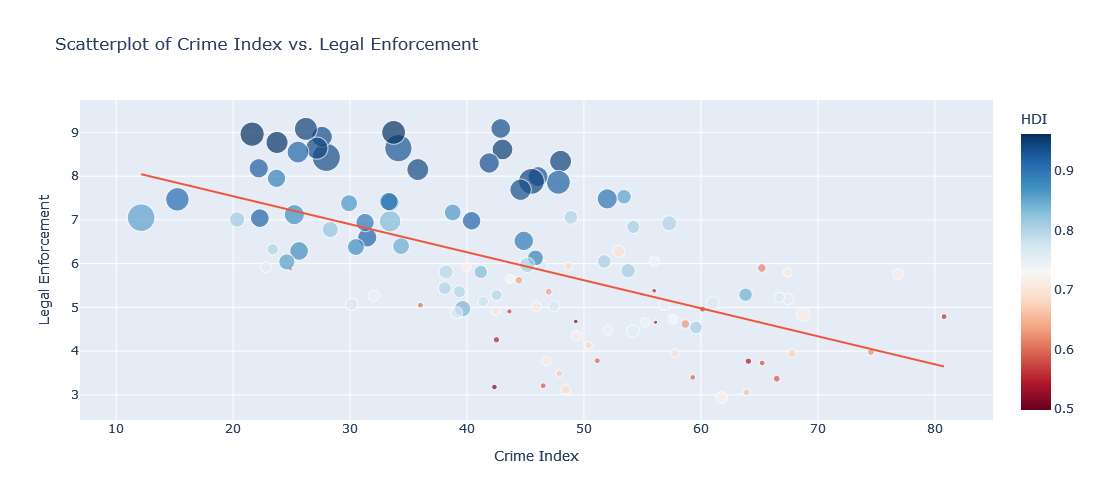

In [3]:
hfi = pd.read_csv("datasets/hfi-2023.csv")
crime = pd.read_csv("datasets/crime-rate-by-country-2023.csv")

hfi2021 = hfi[hfi["year"] == 2021]
hfi2021.rename(columns = {'countries': 'country'}, inplace = True)
crimehfi = crime.join(hfi2021.set_index('country'), on='country', how = "inner")

HDI = pd.read_csv("datasets/Human Development Index.csv")
HDI_score = HDI[["Country", 'Human Development Index (2021)', 'Gross National Income Per Capita (2021)']].dropna()
HDI_score.rename(columns = {'Country': 'country', 'Human Development Index (2021)' : 'HDI', 'Gross National Income Per Capita (2021)': 'GDP'}, inplace = True)

crimehdfi = crimehfi.join(HDI_score.set_index('country'), on='country', how = "inner")

# Create scatterplot
fig = px.scatter(crimehdfi, 
                 x='crimeIndex', 
                 y='ef_legal', 
                 color='HDI',
                size='GDP',  # Use GDP_per_capita for dot sizes
                 size_max=20,  # Maximum size of the dots
                 color_continuous_scale='RdBu',  # You can choose any color scale
                 title='Scatterplot of Crime Index vs. Legal Enforcement',
                 labels={'crimeIndex': 'Crime Index', 'ef_legal': 'Legal Enforcement'},
                 trendline='ols',
                 hover_name='country')

fig.update_layout(
    height=500,
)

# Show the figure
fig.show()